## Twitter Emotion Analysis using Decision Tree Classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [2]:
df=pd.read_csv('data.csv')
display(df.head())

,Sl no,Tweets,Search key,Feeling
0,1,"#1: @fe ed ""RT @MirayaDizon1: Time is ticking...",happy moments,happy
1,2,"#2: @蓮花 &はすか ed ""RT @ninjaryugo: ＃コナモンの日 だそうで...",happy moments,happy
2,3,"#3: @Ris ♡ ed ""Happy birthday to one smokin h...",happy moments,happy
3,4,"#4: @월월 [씍쯴사랑로봇] jwinnie is the best, cheer u...",happy moments,happy
4,5,"#5: @Madhurima wth u vc♥ ed ""Good morning dea...",happy moments,happy


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be r

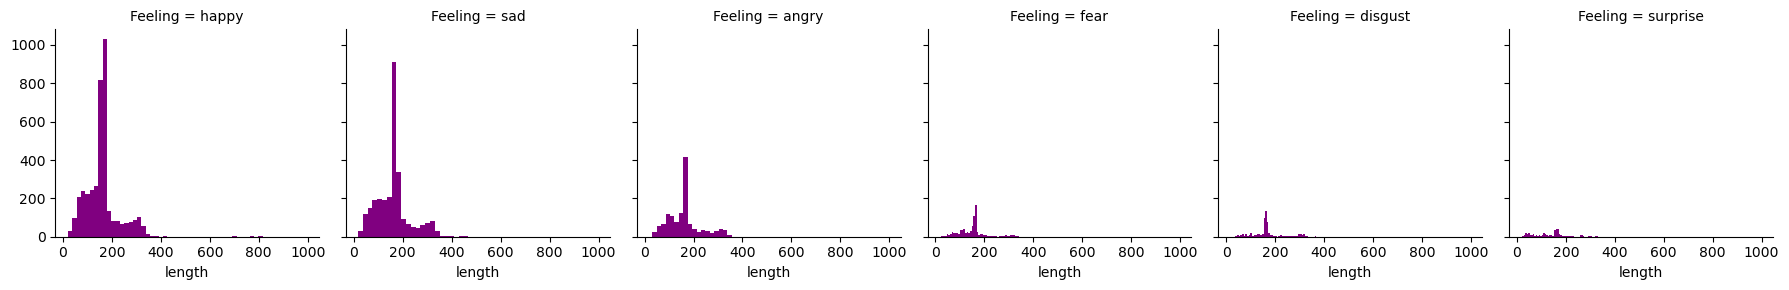

In [4]:
df.describe(include='all')
df['length']=df['Tweets'].apply(len)
df.head()
graph=sns.FacetGrid(data=df,col='Feeling')
graph.map(plt.hist,'length',bins=50,color='Purple')

In [5]:
val=df.groupby('Feeling').mean()
val

C:\Users\NAUFAL HAFIZH\AppData\Local\Temp\ipykernel_18420\3290861532.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  val=df.groupby('Feeling').mean()


,Sl no,length
Feeling,,
angry,4932.246085,165.794183
disgust,4262.874411,170.572998
fear,4122.549247,152.156431
happy,4560.091141,160.319501
sad,5739.734995,161.599158
surprise,7632.000000,136.441103


In [6]:
val.corr()

,Sl no,length
Sl no,1.000000,-0.742981
length,-0.742981,1.000000


In [9]:
df.Feeling.value_counts()

happy       3928
sad         2849
angry       1341
fear         863
disgust      637
surprise     399
Name: Feeling, dtype: int64

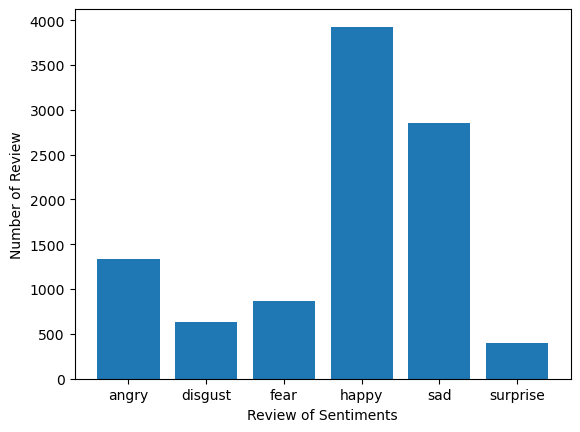

In [10]:
Sentiment_val=df.groupby('Feeling').count()
plt.bar(Sentiment_val.index.values,Sentiment_val['Tweets'])
plt.xlabel('Review of Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [11]:
token=RegexpTokenizer(r'[a-zA-Z0-9]+')
cv=CountVectorizer(lowercase=True,stop_words='english',ngram_range=(1,1),tokenizer=token.tokenize)
text_counts=cv.fit_transform(df['Tweets'])
tf=TfidfVectorizer()
text_tf=tf.fit_transform(df['Tweets'])

In [12]:
x=text_tf
y=df['Feeling']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [13]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print('Confusion Matrix for Decision Tree')
print(confusion_matrix(y_test,preddt))

Confusion Matrix for Decision Tree
[[ 352    0    1   31   10    1]
 [   1  176    2   16    3    0]
 [   0    0  206   38    2    4]
 [  21    9   23 1098   56   15]
 [  12    3    6   98  710    1]
 [   0    0    0   16    0   95]]


In [17]:
score=round(accuracy_score(y_test,preddt)*100,2)
print('Score = ',score,'%')

Score =  87.72 %


In [18]:
print('Classification Report : ')
print(classification_report(y_test,preddt))

Classification Report : 
              precision    recall  f1-score   support

       angry       0.91      0.89      0.90       395
     disgust       0.94      0.89      0.91       198
        fear       0.87      0.82      0.84       250
       happy       0.85      0.90      0.87      1222
         sad       0.91      0.86      0.88       830
    surprise       0.82      0.86      0.84       111

    accuracy                           0.88      3006
   macro avg       0.88      0.87      0.87      3006
weighted avg       0.88      0.88      0.88      3006

